In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline


In [3]:
holidays_df = pd.read_csv("C:/Users/Babayeju/Desktop/Github/Holiday_EDA/travelanalysis.csv")

In [4]:
holidays_df.head()

,rundate,report_period,region_num,foreign_region,foreign_country,uk_group,uk_apt,foreign_apt,ty_total,ty_sch,ty_char,ly_total,ly_sch,ly_char,pc_change
0,20/03/2023 10:46,2022,1,WESTERN EUROPE-EU,AUSTRIA,1,GATWICK,INNSBRUCK,131247,109163,22084,9300,8230,1070,1311.25806
1,20/03/2023 10:46,2022,1,WESTERN EUROPE-EU,AUSTRIA,1,GATWICK,SALZBURG,48452,35061,13391,1858,1544,314,2507.75027
2,20/03/2023 10:46,2022,1,WESTERN EUROPE-EU,AUSTRIA,1,GATWICK,VIENNA,203487,203425,62,106,106,0,191868.86790
3,20/03/2023 10:46,2022,1,WESTERN EUROPE-EU,AUSTRIA,1,HEATHROW,INNSBRUCK,36025,36025,0,2541,2541,0,1317.74892
4,20/03/2023 10:46,2022,1,WESTERN EUROPE-EU,AUSTRIA,1,HEATHROW,SALZBURG,26813,26813,0,2419,2419,0,1008.43324


In [5]:
holidays_df.nunique()



rundate               1
report_period         1
region_num           21
foreign_region       21
foreign_country     124
uk_group              2
uk_apt               42
foreign_apt         551
ty_total           2260
ty_sch             1868
ty_char             869
ly_total           1770
ly_sch             1508
ly_char             607
pc_change          1721
dtype: int64

In [6]:
fc_total = holidays_df.groupby('foreign_country')['ty_total'].sum()
fc_total.head(50)


foreign_country
AFGHANISTAN                  0
ALBANIA                 487235
ALGERIA                  96603
ANTIGUA AND BARBUDA     183457
ARGENTINA               124981
ARMENIA                     99
ASCENSION ISLAND           627
AUSTRALIA               473482
AUSTRIA                1736370
AZERBAIJAN               33801
BAHAMAS                  62347
BAHRAIN                 458203
BANGLADESH              211432
BARBADOS                565327
BELARUS                      0
BELGIUM                 987940
BERMUDA                  86930
BOSNIA-HERZEGOVINA       23071
BRAZIL                  484123
BRUNEI                   30963
BULGARIA               1648163
CANADA                 2689175
CAPE VERDE ISLANDS      367755
CAYMAN ISLANDS           64110
CHILE                    60144
CHINA                    37928
COLOMBIA                125965
COSTA RICA               66753
CROATIA                1627719
CUBA                     55105
CYPRUS                 2792079
CZECH REPUBLIC         

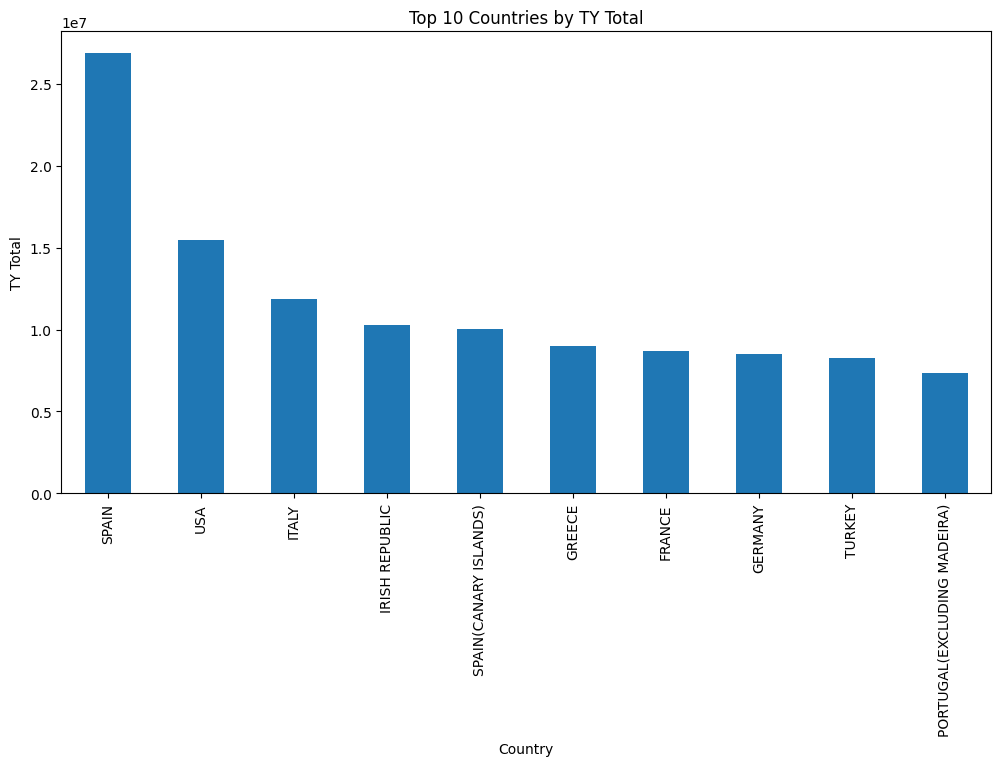

In [7]:
# Sort the values in descending order and select the top 10
fc_total_top10 = fc_total.sort_values(ascending=False).head(10)

# Plot the data using pandas built-in functionality
fc_total_top10.plot(kind='bar', figsize=(12, 6))

# Give the plot a title and label the axes
plt.title('Top 10 Countries by TY Total')
plt.xlabel('Country')
plt.ylabel('TY Total')


# Show the plot
plt.show()

In [8]:
# Assuming 'foreign_apt' and 'ty_total' are columns in your DataFrame

# Group by 'foreign_country' and 'foreign_apt', and sum 'ty_total'
apt_total = holidays_df.groupby(['foreign_country', 'foreign_apt'])['ty_total'].sum().reset_index()

# Sort the data within each 'foreign_country' by 'ty_total' in descending order
apt_total = apt_total.sort_values(['foreign_country', 'ty_total'], ascending=[True, False])

# Select the top 10 countries
top_countries = fc_total_top10.index.tolist()

# Filter data to include only the top 10 countries
apt_total_top10 = apt_total[apt_total['foreign_country'].isin(top_countries)]

# For each country, select the top 5 'foreign_apt'
top5_apt_per_country = apt_total_top10.groupby('foreign_country').head(5)
top5_apt_per_country.head(50)
# Now 'top5_apt_per_country' is a DataFrame with the top 5 'foreign_apt' for each of the top 10 'foreign_country'


,foreign_country,foreign_apt,ty_total
145,FRANCE,PARIS (CHARLES DE GAULLE),2970367
143,FRANCE,NICE,1312469
139,FRANCE,MARSEILLE,561522
119,FRANCE,BORDEAUX,541805
159,FRANCE,TOULOUSE (BLAGNAC),528811
174,GERMANY,FRANKFURT MAIN,2220454
165,GERMANY,BERLIN BRANDENBURG,1688853
184,GERMANY,MUNICH,1537675
171,GERMANY,DUSSELDORF,755356
177,GERMANY,HAMBURG,704636


In [9]:
import plotly.offline as pyo
import plotly.graph_objects as go


# Create a list to store traces
data = []

# Create a trace for each 'foreign_apt'
for apt in top5_apt_per_country['foreign_apt'].unique():
    apt_df = top5_apt_per_country[top5_apt_per_country['foreign_apt'] == apt]
    trace = go.Bar(
        x=apt_df['foreign_country'],
        y=apt_df['ty_total'],
        name=apt,
        text=apt_df['ty_total'],
        textposition='auto'
    )
    data.append(trace)

# Define layout
layout = go.Layout(
    barmode='stack',
    title='Top 5 Foreign APT per Country',
    xaxis=dict(title='Country'),
    yaxis=dict(title='TY Total')
)

# Create figure and add data
fig = go.Figure(data=data, layout=layout)
fig.update_xaxes(categoryorder ='total ascending')

# Write the plot to an HTML file and open it in a web browser
pyo.plot(fig, filename='stacked_bar_chart.html', auto_open=True)


'stacked_bar_chart.html'

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering
X = top5_apt_per_country['ty_total'].values.reshape(-1,1)

# It's often a good practice to scale features before clustering
scaler = StandardScaler()
X = scaler.fit_transform(X)

c:\Users\Babayeju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\Babayeju\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\Babayeju\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\Babayeju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The def

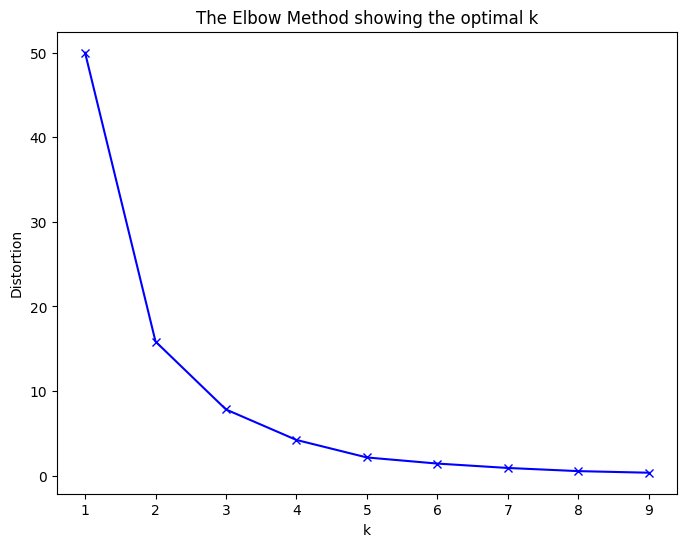

In [11]:
# Calculate distortions for different numbers of clusters
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [12]:
# Assume that the optimal number of clusters is 3
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(X)

# Assign each 'foreign_apt' to a cluster
top5_apt_per_country['cluster'] = kmeanModel.labels_

top5_apt_per_country.head(50)


c:\Users\Babayeju\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Babayeju\AppData\Local\Temp\ipykernel_36568\2277836527.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,foreign_country,foreign_apt,ty_total,cluster
145,FRANCE,PARIS (CHARLES DE GAULLE),2970367,0
143,FRANCE,NICE,1312469,3
139,FRANCE,MARSEILLE,561522,4
119,FRANCE,BORDEAUX,541805,4
159,FRANCE,TOULOUSE (BLAGNAC),528811,4
174,GERMANY,FRANKFURT MAIN,2220454,0
165,GERMANY,BERLIN BRANDENBURG,1688853,3
184,GERMANY,MUNICH,1537675,3
171,GERMANY,DUSSELDORF,755356,4
177,GERMANY,HAMBURG,704636,4


In [31]:
import re
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="geoapiExercises")

def geolocate(airport):
    # Try to get the location (latitude, longitude) of an airport
    try:
        # Extract airport name from the string
        match = re.search(r'\((.*?)\)', airport)
        if match:
            airport_name = match.group(1)
        else:
            airport_name = airport  # If no brackets, use the whole string
        
        # Geolocate the airport
        location = geolocator.geocode(airport_name)
        # Return latitude and longitude
        return (location.latitude, location.longitude)
    except:
        # Return NaN
        return (np.nan, np.nan)

# Create a copy of the DataFrame
top5_apt_per_country_geo = top5_apt_per_country.copy()

# Add a small delay between geocoding requests to avoid service denial
delay = 0.1

# Get the latitude and longitude of each foreign_apt
for idx, row in top5_apt_per_country_geo.iterrows():
    airport = row['foreign_apt']
    lat, lon = geolocate(airport)
    top5_apt_per_country_geo.loc[idx, 'Latitude'] = lat
    top5_apt_per_country_geo.loc[idx, 'Longitude'] = lon
    time.sleep(delay)

# Manually correct the latitude and longitude for AZORES LAJES TERCEIRA ISLAND
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'AZORES LAJES TERCEIRA ISLAND', 'Latitude'] = 38.7648
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'AZORES LAJES TERCEIRA ISLAND', 'Longitude'] = -27.0908
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'ZAKINTHOS', 'Latitude'] = 37.7544
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'ZAKINTHOS', 'Longitude'] = 28.8866
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'TENERIFE (SURREINA SOFIA)', 'Latitude'] = 28.0468
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'TENERIFE (SURREINA SOFIA)', 'Longitude'] = 16.5725
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'FRANKFURT MAIN', 'Latitude'] = 50.0380
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'FRANKFURT MAIN', 'Longitude'] = 8.5622
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'NEW YORK (JF KENNEDY)', 'Latitude'] = 40.6446
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'NEW YORK (JF KENNEDY)', 'Longitude'] = -73.780968
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'ARRECIFE', 'Latitude'] = 28.9652
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'ARRECIFE', 'Longitude'] = -13.5477
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'SANTA CRUZ DE LA PALMA	', 'Latitude'] = 28.6840
top5_apt_per_country_geo.loc[top5_apt_per_country_geo['foreign_apt'] == 'SANTA CRUZ DE LA PALMA	', 'Longitude'] = -17.7642


In [32]:
top5_apt_per_country_geo = top5_apt_per_country_geo.sort_values(by='cluster')
top5_apt_per_country_geo.head(50)

,foreign_country,foreign_apt,ty_total,cluster,Latitude,Longitude
145,FRANCE,PARIS (CHARLES DE GAULLE),2970367,0,43.648777,3.943544
365,PORTUGAL(EXCLUDING MADEIRA),LISBON,2486600,0,38.707751,-9.136592
428,SPAIN,MADRID,2653571,0,40.416705,-3.703582
483,TURKEY,ANTALYA,2485384,0,36.887294,30.707455
485,TURKEY,DALAMAN,2079360,0,36.767214,28.800274
488,TURKEY,ISTANBUL,1885168,0,41.009198,28.966219
443,SPAIN(CANARY ISLANDS),ARRECIFE,2622412,0,28.965200,-13.547700
527,USA,NEW YORK (JF KENNEDY),2977960,0,40.644600,-73.780968
174,GERMANY,FRANKFURT MAIN,2220454,0,50.038000,8.562200
364,PORTUGAL(EXCLUDING MADEIRA),FARO,3748125,1,37.016273,-7.935177


In [33]:
import folium

# Create a map centered around some location
map = folium.Map(location=[50, 0], zoom_start=2)

# Define colors for clusters (you can add more colors if there are more clusters)
colors = ['red', 'blue', 'green','orange','white']

# Loop over the data and add each data point to the map
for idx, row in top5_apt_per_country_geo.iterrows():
    # Get the location (latitude, longitude)
    location = (row['Latitude'], row['Longitude'])
    # Get the cluster
    cluster = row['cluster']
    # Get the foreign_apt
    apt_name = row['foreign_apt']
    # Choose the color for the marker
    color = colors[cluster]
    # Create a string that includes both the 'foreign_apt' and the 'cluster'
    popup_text = f"{apt_name}, Cluster {cluster}"
    # Add a marker for this location to the map
    folium.Marker(location, popup=popup_text, icon=folium.Icon(color=color)).add_to(map)

# Display the map
map
